In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

In [97]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Real_Estate_Sales_2001-2022_GL.csv",encoding='unicode_escape', low_memory=False)

In [98]:
#Previewing the dataset
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [101]:
#Getting the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [103]:
#Checking for NULL
df.isnull().sum()

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64

In [105]:
#Removing some column
Df = df.drop(['OPM remarks', 'Assessor Remarks'], axis=1)

In [106]:
Df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Location             object
dtype: object

In [109]:
#changing Data Types
Df['Date Recorded'] = pd.to_datetime(Df['Date Recorded'])
Df['Town'] = Df['Town'].astype('category')
Df['Property Type'] = Df['Property Type'].astype('category')
Df['Residential Type'] = Df['Residential Type'].astype('category')
Df['Non Use Code'] = Df['Non Use Code'].astype('category')

In [110]:
#Average Sale Price
average_sale = math.ceil(Df['Sale Amount'].mean()*100) / 100
average_sale

405314.56

In [113]:
#Average Sales for each Town 
average_sale_per_town = Df.groupby('Town', observed=True)['Sale Amount'].mean().apply(lambda x: math.ceil(x * 100) / 100)
average_sale_per_town

Town
***Unknown***    282450.00
Andover          227606.36
Ansonia          215572.96
Ashford          210955.16
Avon             476632.65
                   ...    
Windsor Locks    282505.04
Wolcott          238495.11
Woodbridge       471320.47
Woodbury         334888.20
Woodstock        218883.21
Name: Sale Amount, Length: 170, dtype: float64

In [115]:
#Top 5 Towns with the highest Sales
top_towns = average_sale_per_town.nlargest(5)
top_towns

Town
Willington    4147612.49
Greenwich     2108126.08
Darien        1600003.15
New Canaan    1544810.75
Westport      1480954.61
Name: Sale Amount, dtype: float64

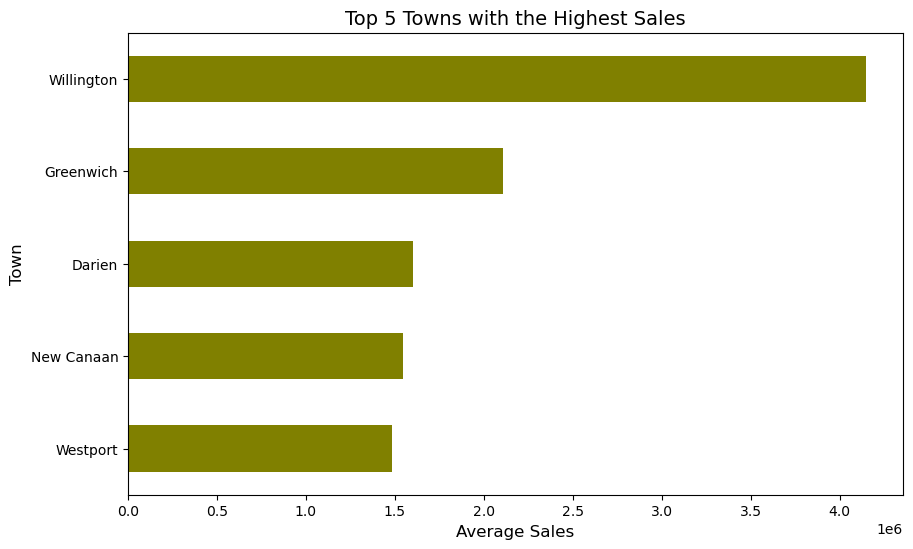

In [143]:
# Plot
top_towns.plot(kind='barh', figsize=(10, 6), color='olive')

# Titles & Labels
plt.xlabel("Average Sales", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.title("Top 5 Towns with the Highest Sales", fontsize=14)
plt.gca().invert_yaxis()  # Invert to show highest at the top

# Show Chart
plt.show()


In [119]:
#Average assessed value for each Town
#firstly Group, Calculate Mean, Round Up
avg_assess_value_per_town = Df.groupby('Town', observed =True)['Assessed Value'].mean().apply(lambda x: math.ceil(x * 100) / 100) # Round up to 2 decimal places

#Format for Display
avg_assess_value_per_town_display = avg_assess_value_per_town.apply(lambda x: f"${x:,.2f}")
avg_assess_value_per_town_display

Town
***Unknown***     $66,540.00
Andover          $138,761.83
Ansonia          $135,601.83
Ashford          $126,507.43
Avon             $299,593.29
                    ...     
Windsor Locks    $169,651.65
Wolcott          $152,421.74
Woodbridge       $301,654.42
Woodbury         $201,519.04
Woodstock        $135,161.17
Name: Assessed Value, Length: 170, dtype: object

In [121]:
#Total Sale Volume
total_sales_volume = Df['Sale Amount'].sum()
print(f"The Total sales volume is: ${total_sales_volume:,}")

The Total sales volume is: $444,885,014,916.91003


In [123]:
#Unique Towns represented
unique_towns = Df['Town'].unique()
unique_towns

['Andover', 'Ansonia', 'Ashford', 'Avon', 'Beacon Falls', ..., 'Woodbridge', 'Union', 'North Stonington', 'Salisbury', '***Unknown***']
Length: 170
Categories (170, object): ['***Unknown***', 'Andover', 'Ansonia', 'Ashford', ..., 'Wolcott', 'Woodbridge', 'Woodbury', 'Woodstock']

In [133]:
#How many properties were sold in each year?

# Define function to analyze yearly sales
def analyze_yearly_sales(Df):
   
    # Extract year and count sales per year
    yearly_sales = Df['Date Recorded'].dt.year.value_counts().sort_index()
    
    #Convert yearly sales_index to Int from Float
    yearly_sales.index = yearly_sales.index.astype(int)

    #calculate summary statistics
    summary = {
        'total_sales': len(Df),
        'years_analyzed': len(yearly_sales),
        'highest_sales_year': yearly_sales.idxmax(),
        'highest_sales_count': yearly_sales.max(),
        'lowest_sales_year': yearly_sales.idxmin(),
        'lowest_sales_count': yearly_sales.min(),
        'average_yearly_sales': yearly_sales.mean()
    }

    return yearly_sales, summary

In [135]:
# Call function and store results
yearly_sales, summary = analyze_yearly_sales(Df)
print("Sales by year:")
print(yearly_sales)
print("\nSummary statistics:")
print(summary)

Sales by year:
Date Recorded
1999        1
2001    14291
2002    60207
2003    56317
2004    73943
2005    79566
2006    57250
2007    46138
2008    34195
2009    36305
2010    39128
2011    32088
2012    32568
2013    37513
2014    41941
2015    48894
2016    47611
2017    48493
2018    47165
2019    52622
2020    62534
2021    64441
2022    52735
2023    31681
Name: count, dtype: int64

Summary statistics:
{'total_sales': 1097629, 'years_analyzed': 24, 'highest_sales_year': 2005, 'highest_sales_count': 79566, 'lowest_sales_year': 1999, 'lowest_sales_count': 1, 'average_yearly_sales': 45734.458333333336}


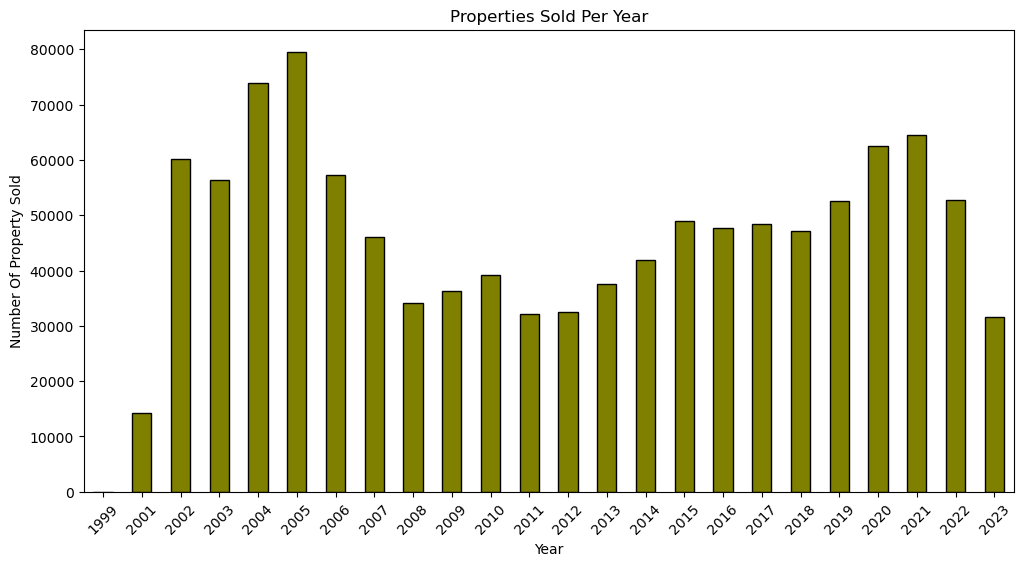

In [137]:
#Plot
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='olive', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Number Of Property Sold")
plt.title("Properties Sold Per Year")
plt.xticks(rotation=45)

plt.show()


In [139]:
#Numbers of each Property
property_type = Df['Property Type'].value_counts()
print('Property Type and their counts:')
print(property_type)

Property Type and their counts:
Property Type
Single Family     401612
Residential       151064
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         7824
Commercial          5987
Four Family         2150
Apartments          1327
Industrial           795
Public Utility        10
Name: count, dtype: int64


In [145]:
#Property Type with the most sells
property_type_sales = Df.groupby('Property Type', observed= True)['Sale Amount'].sum().sort_values(ascending=False).apply(lambda x: f"${x:,.2f}")
property_type_sales

Property Type
Single Family     $156,031,989,859.49
Residential        $71,111,946,679.44
Condo              $27,431,442,679.57
Commercial         $10,045,505,047.05
Apartments          $8,907,999,644.00
Two Family          $5,256,369,988.81
Vacant Land         $3,262,863,982.77
Three Family        $2,263,523,081.00
Industrial          $1,779,245,428.00
Four Family           $675,725,727.00
Public Utility          $2,136,044.00
Name: Sale Amount, dtype: object

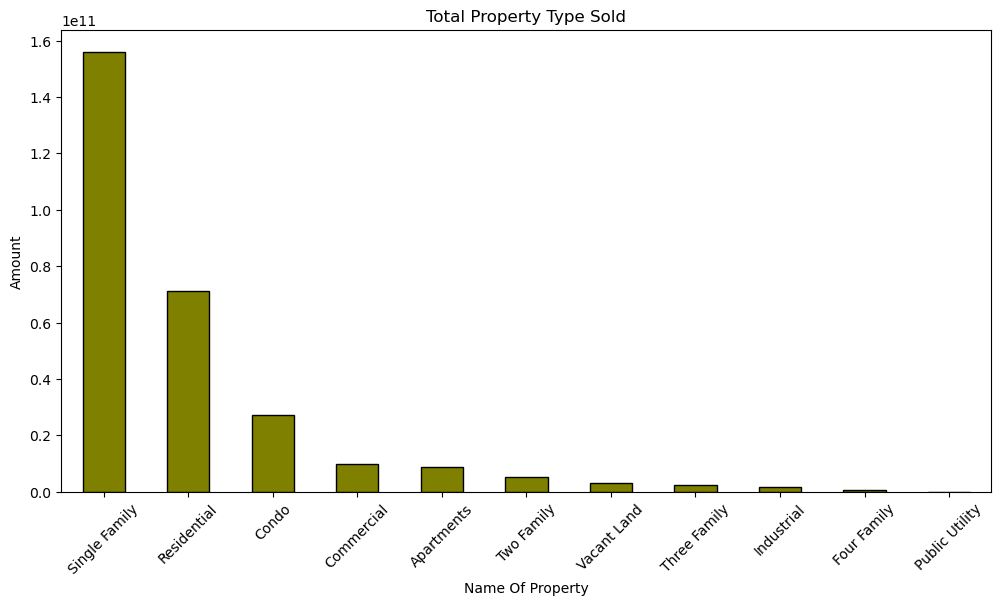

In [153]:
#Plot
# Convert to numeric for plotting (removing "$" but keeping original intact)
property_type_sales_numeric = property_type_sales.replace(r'[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 6))
property_type_sales_numeric.plot(kind='bar', color='olive', edgecolor='black')
plt.xlabel("Name Of Property") 
plt.ylabel("Amount")
plt.title("Total Property Type Sold")
plt.xticks(rotation=45)

plt.show()

In [155]:
#No of properties located in each town,Filter for counts >= 1
property_by_town = Df.groupby('Town', observed= True)['Property Type'].value_counts()[lambda x: x>=1]
property_by_town

Town           Property Type
***Unknown***  Single Family      1
Andover        Single Family    450
               Residential       96
               Vacant Land       13
               Two Family         5
                               ... 
Woodstock      Condo            121
               Vacant Land       73
               Commercial         8
               Two Family         8
               Three Family       1
Name: count, Length: 1423, dtype: int64

In [157]:
#the correlation between assessed value and sale amount?
correlation = Df['Sale Amount'].corr(Df['Assessed Value'])
print(f"Correlation between Assessed value and Sale amount: {correlation:.2f}")

Correlation between Assessed value and Sale amount: 0.13


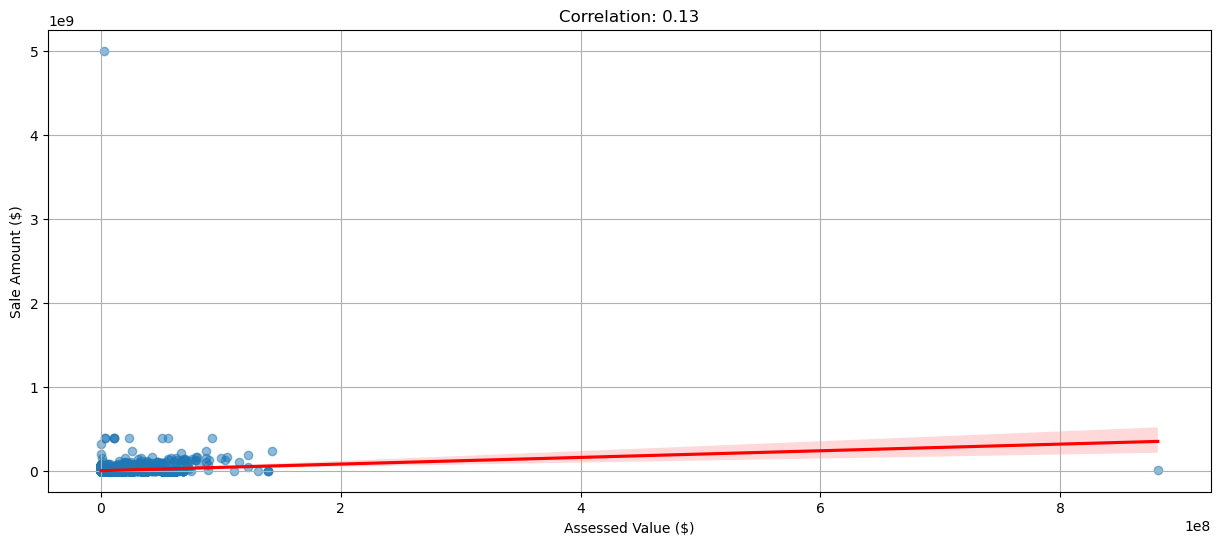

In [189]:
plt.figure(figsize=(15, 6))

# Scatter plot with regression line
sns.regplot(x=Df['Assessed Value'], y=Df['Sale Amount'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels & title
plt.xlabel("Assessed Value ($)")
plt.ylabel("Sale Amount ($)")
plt.title(f"Correlation: {correlation:.2f}")

plt.grid(True)
plt.show()

In [183]:
#Measure of change or growth rate of assessed value

#First Extract the year
Df['Year'] = Df['Date Recorded'].dt.year

#calculate for assessed value
yearly_assessed_value = Df.groupby('Year')['Assessed Value'].mean()

#Growth Rate
growth_rate = yearly_assessed_value.pct_change() * 100

#droppin Null values
growth_rate = growth_rate.dropna()

#to ensure date displays as int
growth_rate.index = growth_rate.index.astype(int)
growth_rate

Year
2001    190.194322
2002     10.252726
2003     20.173713
2004      8.985717
2005      7.104550
2006      5.082349
2007     57.711032
2008     -6.191129
2009     -9.619631
2010     16.194943
2011     -3.326701
2012     21.671821
2013    -12.016663
2014     -8.825914
2015     -5.164466
2016      0.522516
2017      3.891460
2018      1.069004
2019     -5.126324
2020      0.084823
2021      6.503304
2022     -9.824605
2023     12.077127
Name: Assessed Value, dtype: float64

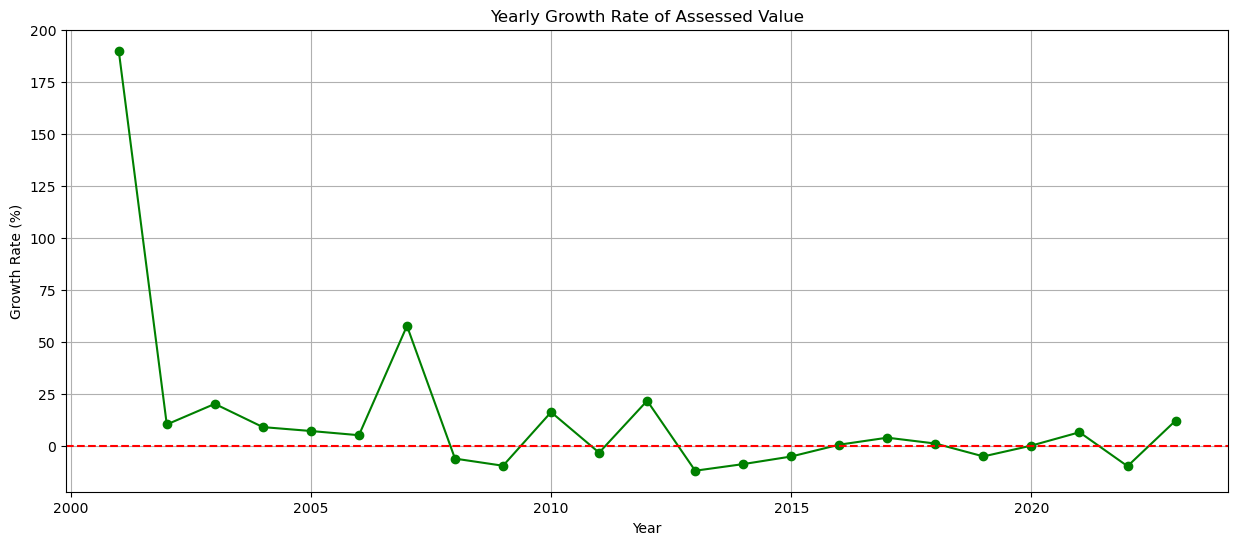

In [187]:
plt.figure(figsize=(15, 6))
plt.plot(growth_rate.index, growth_rate.values, marker='o', linestyle='-', color='green')

plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Yearly Growth Rate of Assessed Value")
plt.axhline(0, color='red', linestyle='--')  # Reference line at 0%
plt.grid(True)

plt.show()

In [193]:
# Extract Year and calculate total sales per year
sales_trend = Df.groupby(Df['Date Recorded'].dt.year, observed=True)['Sale Amount'].sum().reset_index()

# Rename columns for clarity
sales_trend.columns = ['Year', 'Total Sales']

# Convert Year to integer (if needed)
sales_trend['Year'] = sales_trend['Year'].astype(int)
sales_trend

,Year,Total Sales
0,1999,9.500000e+04
1,2001,3.178363e+09
2,2002,1.560357e+10
3,2003,1.720434e+10
4,2004,2.516201e+10
5,2005,3.021333e+10
6,2006,2.159822e+10
7,2007,2.222218e+10
8,2008,1.412136e+10
9,2009,1.177615e+10


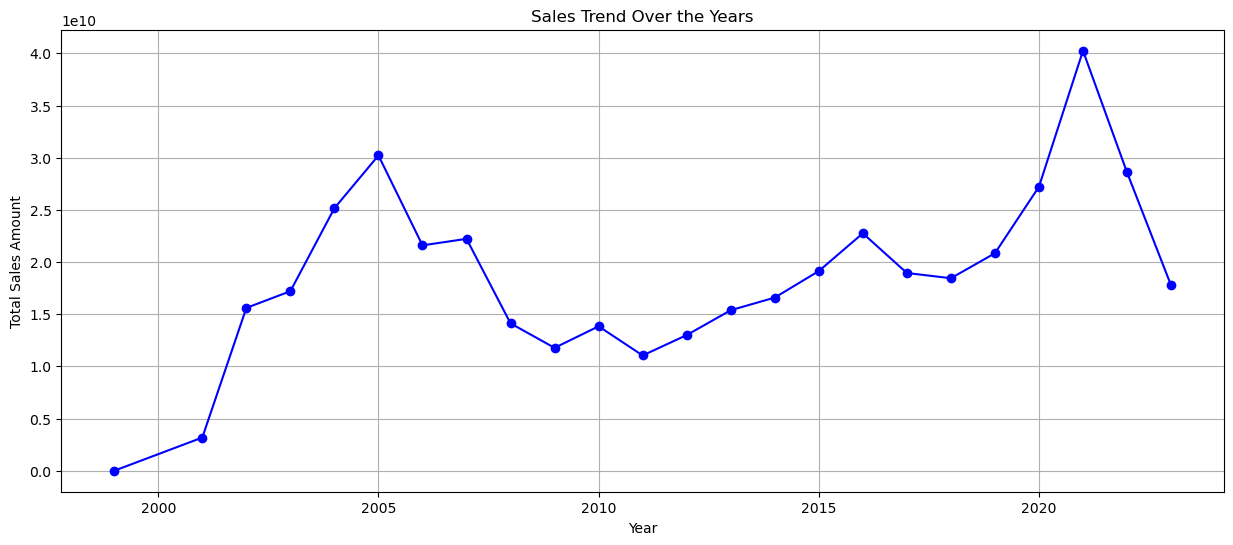

In [195]:
plt.figure(figsize=(15, 6))
plt.plot(sales_trend['Year'], sales_trend['Total Sales'], marker='o', linestyle='-', color='blue')

plt.xlabel("Year")
plt.ylabel("Total Sales Amount")
plt.title("Sales Trend Over the Years")
plt.grid(True)

plt.show()
